In [1]:
import json
import nltk
import gensim
import pandas as pd
import re
import matplotlib.pyplot as plt

from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [94]:
articles = pd.read_csv('Articles.csv', encoding = "ISO-8859-1")
articles = articles.sample(frac=1).reset_index(drop=True) # Shuffling Rows
articles.head(5)

,Article,Date,Heading,NewsType
0,strong>SINGAPORE: Oil prices edged up on Wedne...,11/23/2016,Oil prices edge up on anticipation of OPEC led...,business
1,strong>Bridgetown:Darren Bravo´s third hundred...,6/25/2016,Ton up Bravo Pollard rescue Windi,sports
2,"NORTH SOUND, Antigua: West Indies have replace...",7/12/2016,Ramdin dropped from Windies squad for India seri,sports
3,strong>ISLAMABAD: Minister for Finance Ishaq D...,11/15/2016,No proposal to demonetize Rs 5000 currency not...,business
4,strong>KARACHI: West Indies opner Chris Gayle ...,5/5/2016,Chris Gayle and Ahmed Shehzad friendly banter ...,sports


In [103]:
#Data Pre-processing
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

##Need to fix/improve this stuff
def preprocessing(text):  
    text = text.split()
    # remove numbers
    number_tokens = [re.sub(r'[\d]', ' ', i) for i in text]
     # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
    # remove empty
    length_tokens = [i for i in stemmed_tokens if len(i) > 1]
    return length_tokens

In [106]:
c = cleaning(articles['Article'][0])
p = preprocessing(c)
articles['Article'][0]

'strong>SINGAPORE: Oil prices edged up on Wednesday in anticipation of an OPEC-led crude production cut that is planned to be finalised by the end of the month, through trading was thin ahead of the U.S. Thanksgiving holiday on Thursday.</strongU.S. West Texas Intermediate (WTI) crude oil futures were trading at $46.13 at 0128 GMT, up 10 cents from their last settlement.International Brent crude oil futures were at $49.22 a barrel, up 10 cents. Reuters commodities analyst Wang Tao said that Brent could rise to $49.85 per barrel, a level marked by several technical resistance factors.Despite Wednesday\'s slight increases, analysts said that the market was currently unwilling to push crude prices to $50 a barrel or higher."The market seems unwilling to push oil towards $50 a barrel ahead of the Thanksgiving holiday tomorrow," said Jeffrey Halley, senior market analyst at OANDA brokerage in Singapore. "Their reticence is understandable given that longs (long positions) put on above that l

In [107]:
articles["Article"] = articles["Article"].str.replace("strong>","")
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
p_stemmer = PorterStemmer()
all_content = []
k = 0
j = 0
for s in articles['Article']:
    #Data cleaning
    clean_content = cleaning(s)
    
    #Pre-processing
    processed_email = preprocessing(clean_content)
    
    # add tokens to list
    if processed_email:
        all_content.append(LabeledSentence1(processed_email,[j]))
        j+=1
        
    k+=1

In [108]:
print("Number of articles processed: ", k)
print("Number of non-empty article vectors: ", j)

Number of articles processed:  2692
Number of non-empty article vectors:  2692


In [111]:
all_content[4]

TaggedDocument(words=['karachi', 'west', 'indi', 'opner', 'chri', 'gayl', 'took', 'friendli', 'jibe', 'at', 'pakistan', 'out', 'of', 'favour', 'open', 'ahm', 'shehzad', 'strongshehzad', 'took', 'to', 'twitter', 'to', 'initi', 'chat', 'session', 'with', 'hi', 'fan', 'which', 'got', 'joli', 'respons', 'from', 'west', 'indi', 'superstar', 'chri', 'gayl', 'dir', 'ltr', 'lang', 'en', 'ahmad', 'shahzad', 'iamahmadshahzad', 'href', 'twitter', 'iamahmadshahzad', 'statu', 'may', 'ain', 'respons', 'to', 'the', 'tweet', 'gayl', 'who', 'had', 'been', 'teammat', 'with', 'the', 'pakistan', 'open', 'at', 'jamaica', 'tallawah', 'dure', 'the', 'inaugur', 'edit', 'of', 'the', 'caribbean', 'premier', 'leagu', 'ask', 'shehzad', 'whether', 'excess', 'selfi', 'were', 'the', 'reason', 'behind', 'hi', 'axe', 'from', 'the', 'pakistan', 'team', 'dir', 'ltr', 'lang', 'en', 'chri', 'gayl', 'henrygayl', 'href', 'twitter', 'henrygayl', 'statu', 'may', 'ashehzad', 'is', 'known', 'for', 'pose', 'for', 'selfi', 'and',

In [112]:
d2v_model = Doc2Vec(all_content, size = 2000, window = 10, min_count = 500, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

/Users/aarya/anaconda/envs/symposia/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [126]:
articles.loc[1].NewsType

'sports'

In [120]:
print (d2v_model.docvecs.most_similar(1))

[(749, 0.9740104675292969), (1860, 0.9680447578430176), (658, 0.9677472710609436), (2667, 0.9629857540130615), (2664, 0.961216926574707), (146, 0.9586263298988342), (2479, 0.9583473205566406), (1842, 0.9582377076148987), (302, 0.9579676985740662), (1954, 0.9565292596817017)]


/Users/aarya/anaconda/envs/symposia/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [117]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100)  
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()

/Users/aarya/anaconda/envs/symposia/lib/python3.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  from ipykernel import kernelapp as app


In [118]:
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

/Users/aarya/anaconda/envs/symposia/lib/python3.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':
/Users/aarya/anaconda/envs/symposia/lib/python3.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  from ipykernel import kernelapp as app
/Users/aarya/anaconda/envs/symposia/lib/python3.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  app.launch_new_instance()


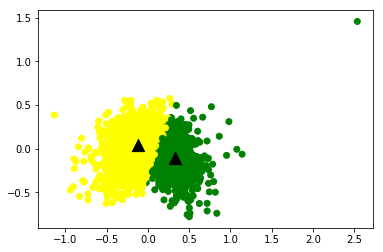

In [119]:
plt.figure
label1 = ["#FFFF00", "#008000"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()